<a href="https://colab.research.google.com/github/shiv-coder/AIDI1002W2026/blob/main/Module8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving week7_student_scores.csv to week7_student_scores.csv
  StudentID  HoursStudied  Attendance  AssignmentsCompleted  PreviousScore
0      S001            12          92                    10             78
1      S002             5          75                     6             60
2      S003             9          85                     8             72
3      S004             2          55                     3             40
4      S005            14          95                    10             90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   StudentID             10 non-null     object
 1   HoursStudied          10 non-null     int64 
 2   Attendance            10 non-null     int64 
 3   AssignmentsCompleted  10 non-null     int64 
 4   PreviousScore         10 non-null     int64 
dtypes: int64(4), object(1)
memory usag

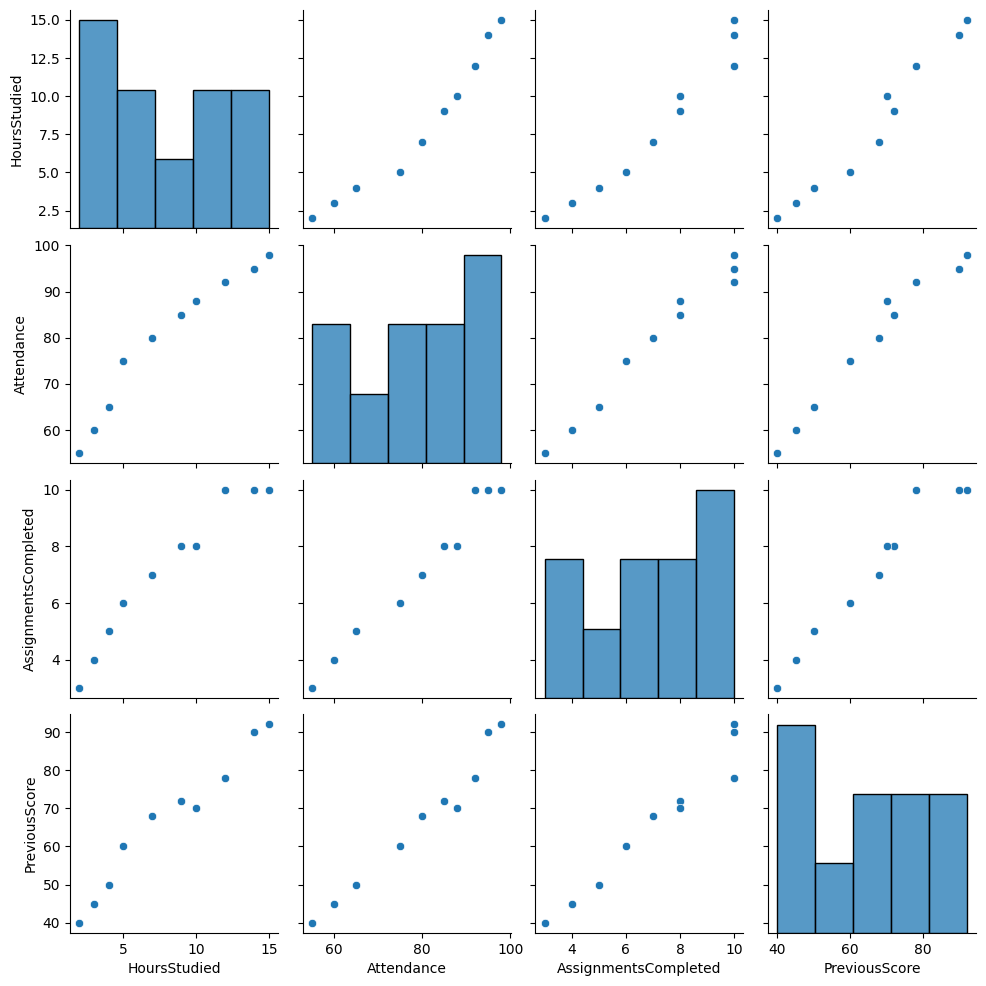

In [1]:
#Activity 1 — Load Dataset & Explore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# Preview data
print(df.head())

# TODO 1: Dataset info and missing values
print(df.info())  # Shows columns and data types
print(df.isnull().sum())  # Checks missing values

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [2]:
#Activity 2 — Data Preprocessing (Standardization)
# Select numerical columns (excluding StudentID)
from sklearn.preprocessing import StandardScaler
X = df[['HoursStudied', 'Attendance', 'AssignmentsCompleted', 'PreviousScore']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first few scaled values
print(X_scaled[:5])

[[ 0.88797041  0.8865525   1.19492418  0.68018765]
 [-0.70582263 -0.30017132 -0.4532471  -0.38445389]
 [ 0.20491625  0.39790152  0.37083854  0.32530714]
 [-1.38887679 -1.696317   -1.68937557 -1.56738893]
 [ 1.34333985  1.09597436  1.19492418  1.38994868]]


Why Standardization?

Features have different scales:

HoursStudied → up to 15

Attendance → up to 100

PreviousScore → up to 92

If not standardized:

 Bigger numbers dominate clustering

So we convert them to similar scale.

KMeans_Cluster
1    4
2    3
0    3
Name: count, dtype: int64


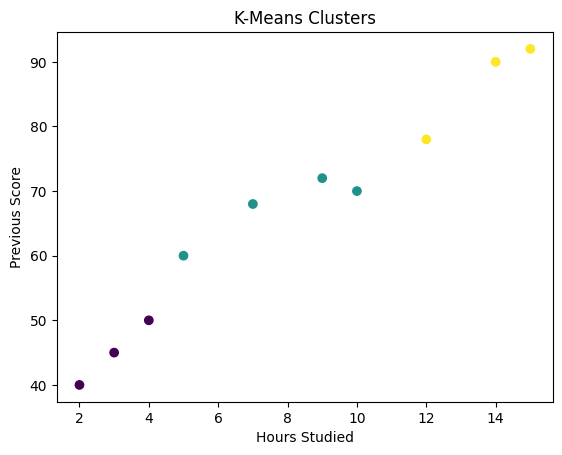

In [3]:
#Activity 3 — K-Means Clustering
from sklearn.cluster import KMeans
# Step 1: Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Step 2: Fit model
kmeans.fit(X_scaled)

# Step 3: Predict clusters
df['KMeans_Cluster'] = kmeans.labels_

# Show cluster counts
print(df['KMeans_Cluster'].value_counts())

# Step 5: Scatter plot (visualization)
plt.scatter(df['HoursStudied'], df['PreviousScore'], c=df['KMeans_Cluster'])
plt.xlabel("Hours Studied")
plt.ylabel("Previous Score")
plt.title("K-Means Clusters")
plt.show()


Cluster 1 → 4 students

Cluster 2 → 3 students

Cluster 0 → 3 students

Total = 10 students (dataset size)
Scatter plot:

Cluster 0 → color purple

Cluster 1 → color yellow

Cluster 2 → color green

In [4]:
#Activity 4 — K-Nearest Neighbors (KNN)
#First we need a target variable (Passed).

#Let’s create synthetic labels:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Create target variable (Passed)
df['Passed'] = df['PreviousScore'] >= 60

#Now KNN:

# Features and target
X = df[['HoursStudied', 'Attendance', 'AssignmentsCompleted', 'PreviousScore']]
y = df['Passed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
[[1 0]
 [0 1]]


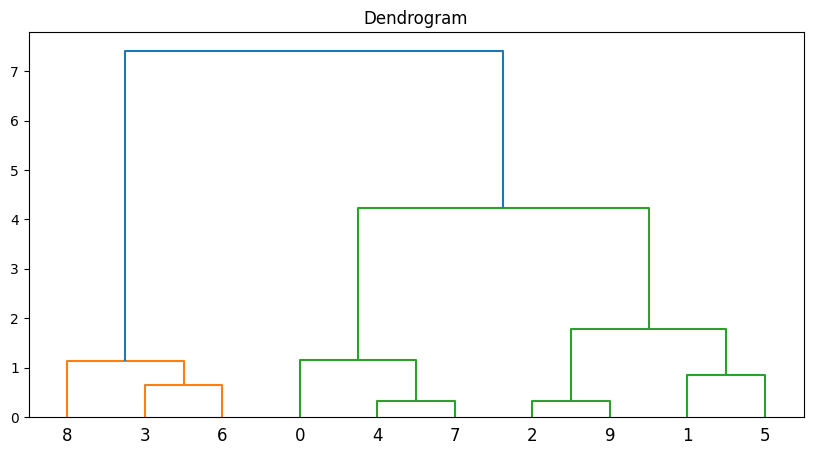

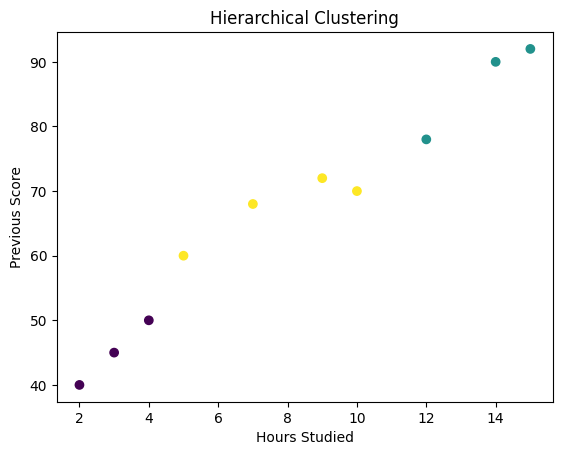

In [5]:
#Activity 5 — Hierarchical Clustering & Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

# Cut dendrogram (3 clusters)
df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

# Scatter plot
plt.scatter(df['HoursStudied'], df['PreviousScore'], c=df['Hierarchical_Cluster'])
plt.xlabel("Hours Studied")
plt.ylabel("Previous Score")
plt.title("Hierarchical Clustering")
plt.show()

In [6]:
#Activity 6 — Compare Results
# Compare K-Means and Hierarchical clusters
print(df[['KMeans_Cluster', 'Hierarchical_Cluster']].head())

# Count samples per cluster
print(df['KMeans_Cluster'].value_counts())
print(df['Hierarchical_Cluster'].value_counts())

# Discussion:
# - If distributions are similar → both methods found similar patterns
# - If different → algorithms grouped data differently

   KMeans_Cluster  Hierarchical_Cluster
0               2                     2
1               1                     3
2               1                     3
3               0                     1
4               2                     2
KMeans_Cluster
1    4
2    3
0    3
Name: count, dtype: int64
Hierarchical_Cluster
3    4
2    3
1    3
Name: count, dtype: int64
